# Exploratory Analysis of Video Game Sales

##### by Stetson Done

---
Hey there! Thanks for checking out this short exploratory data analyis on video game sales. This analysis is serving as an example of how Jupyter Notebooks can be used in conjunction with Markdown & GitHub to annotate and share data analysis projects. 


### Analysis Summary

> In this analysis, we'll take a look at a video game sales dataset found at https://www.kaggle.com/datasets/stetsondone/video-game-sales-by-genre.

### Analysis Goals

1. Find and visualize top performing genres in North America. 
2. Visualize and examine trend of "shooter" genre sales in all regions over the past 40 years.

---
## Data Prep 

In [6]:
# importing necessary libraries for analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

In [2]:
# import the csv file into a DataFrame

df = pd.read_csv('video_game_sales.csv')

# display top 5 rows in dataframe
df.head()

,release_year,genre,region,sales
0,1980,Action,North America,0.32
1,1980,Fighting,North America,0.72
2,1980,Misc,North America,2.53
3,1980,Shooter,North America,6.56
4,1980,Sports,North America,0.46


### Data Cleaning

> To clean the data before analysis and visualization, we'll first validate datatypes, detect and treat duplicates, missing values, and outliers. 

###### Validating Data Types

In [10]:
# printing dataframe information to check column datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1950 entries, 0 to 1949
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   release_year  1950 non-null   int64  
 1   genre         1950 non-null   object 
 2   region        1950 non-null   object 
 3   sales         1950 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 61.1+ KB


It looks like all the columns here are already stored appropriately. 

###### Detecting & Treating Duplicate Values

In [4]:
# checking for duplicate values... if no rows are displayed, no duplicates are present

df[df.duplicated()]

,release_year,genre,region,sales


Lucky for us, it looks like no duplicate values are present in this dataset, so no additional action needs to be taken. 

###### Detecting & Treating Missing Values 

In [5]:
# checking for missing values - column displays with total missing values to the right of column name

df.isnull().sum()

release_year    0
genre           0
region          0
sales           0
dtype: int64

Based on the output above, no missing values are present in the dataset.

###### Detecting & Treating Outliers

For our purposes today, we'll only be using visual methods to detect outliers by creating a boxplot and a histogram. 


We only need to do this for the 'sales' column, as the others are either the release year or categorical data. 

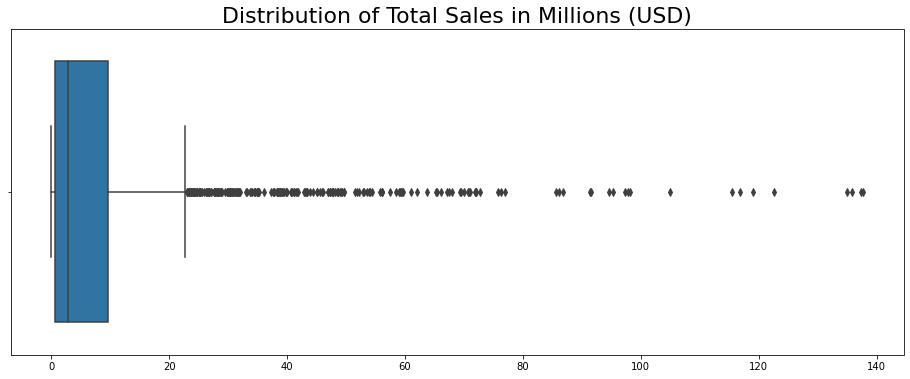

In [33]:
plt.figure(figsize=(16,6))

sns.boxplot(data=df, x='sales')

plt.title('Distribution of Total Sales in Millions (USD)', fontsize=22)

plt.xlabel('');

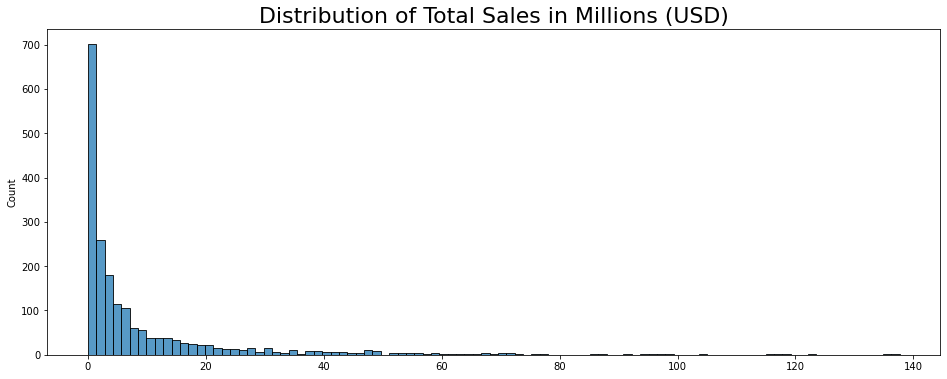

In [36]:
plt.figure(figsize=(16,6))

sns.histplot(data=df, x='sales')


plt.title('Distribution of Total Sales in Millions (USD)', fontsize=22)

plt.xlabel('');

In [118]:
df.sales.describe()

count    1950.000000
mean        9.042892
std        16.171737
min         0.000000
25%         0.690000
50%         2.920000
75%         9.580000
max       137.660000
Name: sales, dtype: float64

As we can see in both plots above, this data is heavily skewed to the left with outliers beginning around 22 million in sales. The majority of sales were between .7 - 9.6 million dollars in sales with a median of $2.92 million in sales for genres in each region. 

  
  
Although the skewed distribution of this data shows many outliers, all numbers appear to be naturally occurring, so they will be left in the dataset.

# Exploratory Analysis 

##  Question #1 - What were the top performing genres in North America overall?

First, we'll use boolean indexing to narrow down the dataframe to only rows where the region is North America. Then, we'll use the .groupby() function to group the results by region and add up the total sales for each genre with .sum(). 

In [38]:
# groups data from north america by genre and adds total sales

df[df['region'] == 'North America'].groupby('genre')['sales'].sum()

genre
Action          863.17
Adventure       101.52
Fighting        220.51
Misc            399.57
Platform        444.44
Puzzle          121.13
Racing          356.86
Role-Playing    330.04
Shooter         584.83
Simulation      180.67
Sports          671.20
Strategy         67.75
Name: sales, dtype: float64

Now let's save this result to a dataframe so we can easily graph it. 

In [40]:
# saves the output above to a new dataframe

na_sales = df[df['region'] == 'North America'].groupby('genre')['sales'].sum().to_frame().reset_index()


# prints out new dataframe
na_sales

,genre,sales
0,Action,863.17
1,Adventure,101.52
2,Fighting,220.51
3,Misc,399.57
4,Platform,444.44
5,Puzzle,121.13
6,Racing,356.86
7,Role-Playing,330.04
8,Shooter,584.83
9,Simulation,180.67


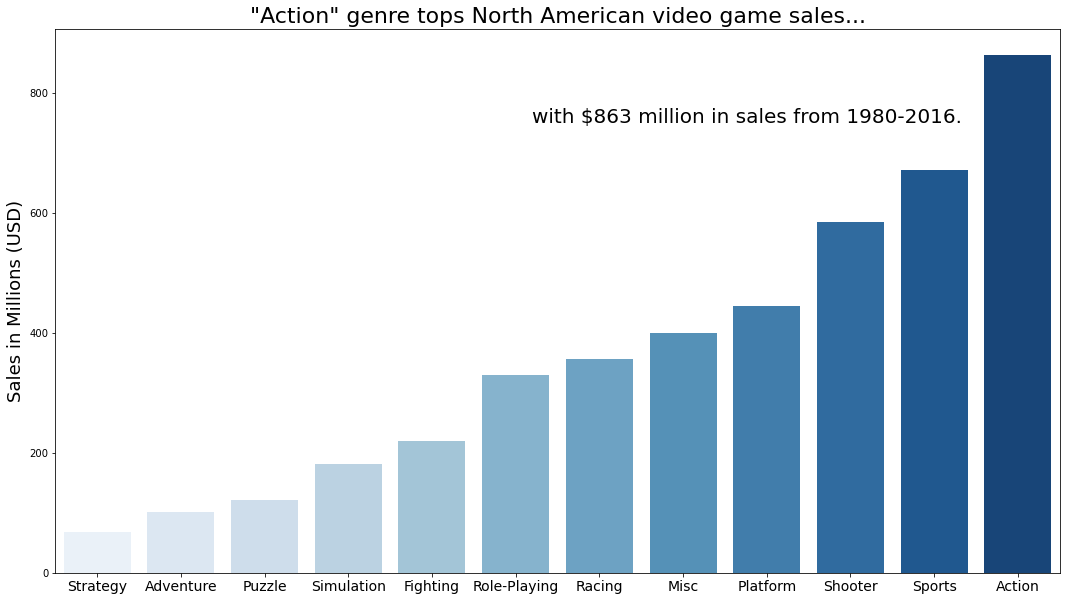

In [119]:
plt.figure(figsize=(18,10))

sns.barplot(data=na_sales.sort_values(by='sales'), x='genre', y='sales', palette='Blues')

plt.title('"Action" genre tops North American video game sales...', fontsize=22)

plt.xticks(fontsize=14)

plt.xlabel('')

plt.ylabel('Sales in Millions (USD)', fontsize=18)

plt.text(5.2, 750, 'with $863 million in sales from 1980-2016.', fontsize=20,);



#### Key Insights:

The top three genres for games sold in North America are shooter games, sports games, and action games. 

## Question #2 - What has been the trend for sales of "shooter" games over the past 40 years? 

In [104]:
shooter = df[(df['genre'] == "Shooter") & (df['region'] == 'Worldwide')].reset_index(drop=True)

In [107]:
shooter.head()

,release_year,genre,region,sales
0,1980,Shooter,Worldwide,7.07
1,1981,Shooter,Worldwide,10.04
2,1982,Shooter,Worldwide,3.79
3,1983,Shooter,Worldwide,0.48
4,1984,Shooter,Worldwide,31.10


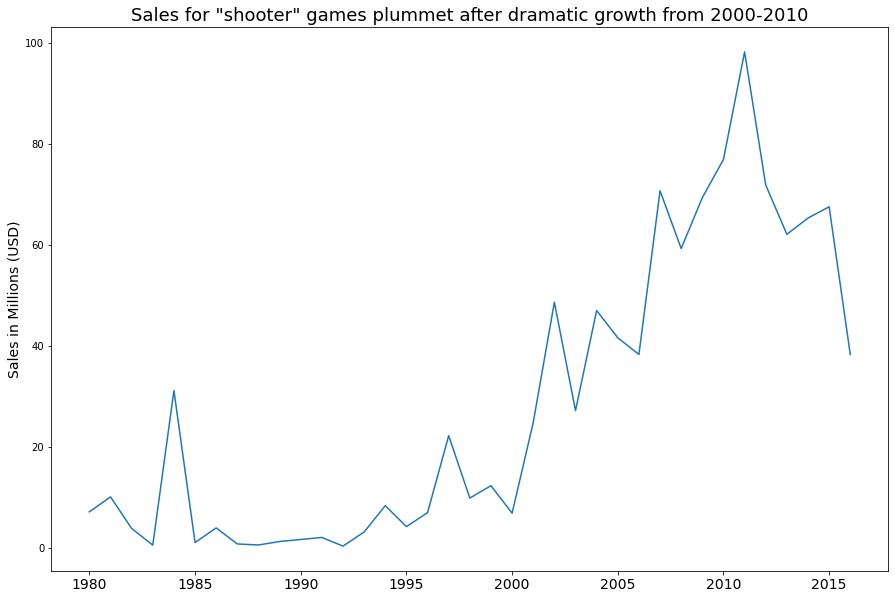

In [117]:
plt.figure(figsize=(15,10))

sns.lineplot(data=shooter, x='release_year', y='sales')

plt.xticks(fontsize=14)

plt.ylabel('Sales in Millions (USD)', fontsize=14)

plt.xlabel('')

plt.title('Sales for "shooter" games plummet after dramatic growth from 2000-2010', fontsize=18);

#### Key Insights: 

Video games in the shooter genre saw a dramatic rise from 2000 through 2010, but have since declined rapidly in the past six years.